In [1]:
import pandas as pd

In [2]:
import numpy as np

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("uber.csv")

In [5]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.drop(columns=["Unnamed: 0","key"], inplace=True)

In [12]:
q1 = df["fare_amount"].quantile(0.25)
q3 = df["fare_amount"].quantile(0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr

In [13]:
outliers = df[(df["fare_amount"] < lb) | (df["fare_amount"] > ub)]

In [14]:
outliers

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
6,24.50,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
30,25.70,2011-05-21 09:00:00 UTC,-73.944815,40.834367,-73.989332,40.721920,4
34,39.50,2014-06-04 06:49:00 UTC,-73.788080,40.642187,-73.865042,40.725997,4
39,29.00,2014-02-13 17:57:00 UTC,-73.992600,40.753172,-73.908508,40.816192,1
48,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1
...,...,...,...,...,...,...,...
199976,49.70,2011-10-18 23:53:00 UTC,-73.978225,40.783318,-73.700963,40.705852,1
199977,43.50,2012-11-20 21:04:30 UTC,-73.996671,40.737483,-73.867758,40.897563,1
199982,57.33,2014-08-06 11:06:06 UTC,-73.969204,40.754771,-73.790351,40.643802,1
199985,24.00,2015-04-18 15:16:06 UTC,-74.005089,40.737301,-73.945290,40.774162,5


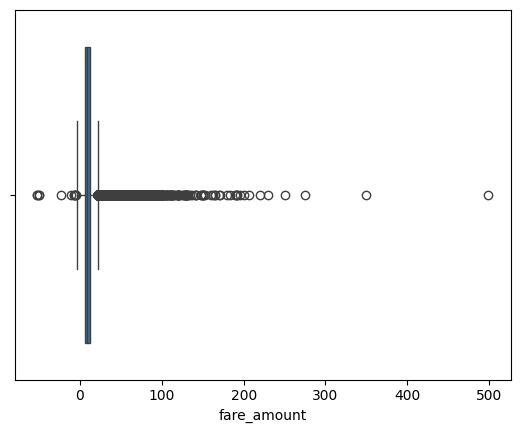

In [15]:
sns.boxplot(x=df["fare_amount"])
plt.show()

In [16]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [18]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.122765,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_datetime,0.122765,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398
pickup_longitude,0.010458,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000


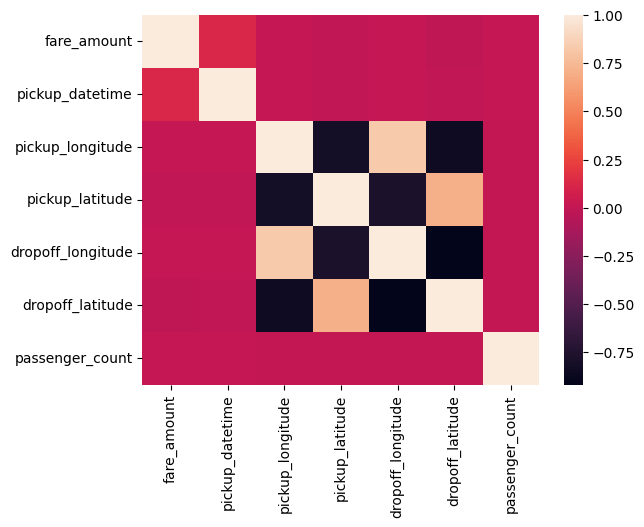

In [19]:
sns.heatmap(df.corr())
plt.show()

In [20]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from math import radians, sin, cos, sqrt, atan2
def fun(lat1, lon1, lat2, lon2):
    R=6371
    dlat = radians(lat2-lat1)
    dlon = radians(lon2-lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
    c=2*atan2(sqrt(a), sqrt(1-a))
    return R*c
df["distance"] = df.apply(lambda x: fun(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

In [33]:
x = df[["distance","passenger_count"]]
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [34]:
md = LinearRegression()

In [35]:
md.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = md.predict(x_test)

In [38]:
y_pred

array([11.28529981, 11.28588076, 11.28506462, ..., 11.2932806 ,
       11.35616064, 11.56651608])

In [41]:
mean_squared_error(y_test, y_pred)

0.0007315956042611704

In [42]:
mean_squared_error(y_test, y_pred)

99.01297653256852

<Axes: xlabel='fare_amount'>

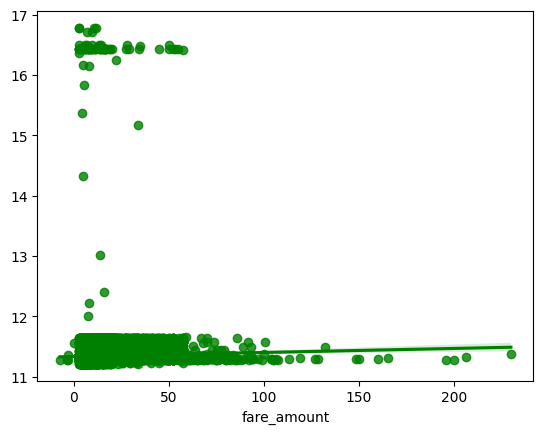

In [44]:
sns.regplot(x=y_test, y=y_pred, color="green")